In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

## Run the particle tracking code
- **Note**: You will have to change main_dir in particle_tracking.py to the path of the folder 'Examples' on your computer for this example to work

In [3]:
!python ../particle_tracking.py

## Code results

In [4]:
results = pd.read_pickle('tracking_results_box_size_example_data.pkl')

- Next, we can look at the resultant data

In [5]:
results.head(10)

,X,Y,Slice,Count,Cost,Area
0,2,10,1,1,-1.0,-1.0
1,3,11,2,1,0.0,-1.0
2,4,12,3,1,0.0,-1.0
3,5,13,4,1,0.0,-1.0
4,6,14,5,1,0.0,-1.0
5,7,15,6,1,-1.0,-1.0
6,25,2,1,2,-1.0,-1.0
7,26,3,2,2,0.0,-1.0
8,27,4,3,2,0.0,-1.0
9,28,5,4,2,0.0,-1.0


## Plotting the obtained trajectories

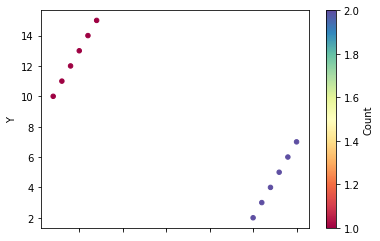

In [6]:
cmap = cm.get_cmap('Spectral')
results.plot.scatter('X', 'Y', c='Count', colormap=cmap)
plt.show()

## Calculating velocities and accelerations of the tracks

In [7]:
results['Vel_x'] = np.where(results['Count'].diff() == 0,
                             results['X'].diff(), np.nan)
results['Vel_y'] = np.where(results['Count'].diff() == 0,
                             results['Y'].diff(), np.nan)
results['Acc_x'] = np.where(results['Count'].diff() == 0,
                             results['Vel_x'].diff(), np.nan)
results['Acc_y'] = np.where(results['Count'].diff() == 0,
                             results['Vel_y'].diff(), np.nan)

In [8]:
results.head(10)

,X,Y,Slice,Count,Cost,Area,Vel_x,Vel_y,Acc_x,Acc_y
0,2,10,1,1,-1.0,-1.0,NaN,NaN,NaN,NaN
1,3,11,2,1,0.0,-1.0,1.0,1.0,NaN,NaN
2,4,12,3,1,0.0,-1.0,1.0,1.0,0.0,0.0
3,5,13,4,1,0.0,-1.0,1.0,1.0,0.0,0.0
4,6,14,5,1,0.0,-1.0,1.0,1.0,0.0,0.0
5,7,15,6,1,-1.0,-1.0,1.0,1.0,0.0,0.0
6,25,2,1,2,-1.0,-1.0,NaN,NaN,NaN,NaN
7,26,3,2,2,0.0,-1.0,1.0,1.0,NaN,NaN
8,27,4,3,2,0.0,-1.0,1.0,1.0,0.0,0.0
9,28,5,4,2,0.0,-1.0,1.0,1.0,0.0,0.0
